In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#import packages for Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
df1=pd.read_csv("healthcare-dataset-stroke-data.csv")
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df1.shape

(5110, 12)

In [4]:
df1.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
df1.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df2 = df1.drop(['id'],axis='columns')
df2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [8]:
df2.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
df2['bmi'].dtype

dtype('float64')

In [10]:
df2['bmi'].fillna(float(df2['bmi'].mean()), inplace=True)
df2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [11]:
df2.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
df2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [13]:
df3 = df2.copy()

In [14]:
df3['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

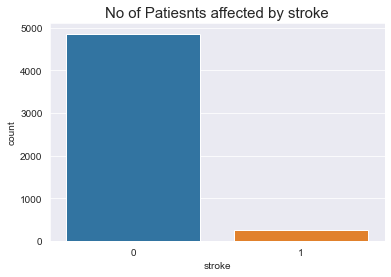

In [15]:
sns.countplot(x=df3['stroke'])
plt.title('No of Patiesnts affected by stroke',fontsize=15)
plt.show()

In [16]:
df3.groupby(['gender'])['stroke'].value_counts()

gender  stroke
Female  0         2853
        1          141
Male    0         2007
        1          108
Other   0            1
Name: stroke, dtype: int64

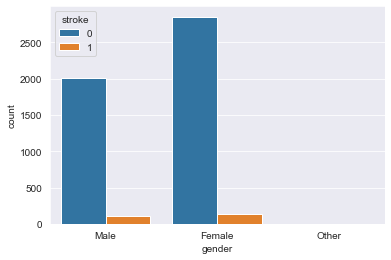

In [17]:
sns.countplot(x=df3['gender'],hue=df3['stroke'])
plt.show()

In [18]:
df3.groupby(['hypertension'])['stroke'].value_counts()

hypertension  stroke
0             0         4429
              1          183
1             0          432
              1           66
Name: stroke, dtype: int64

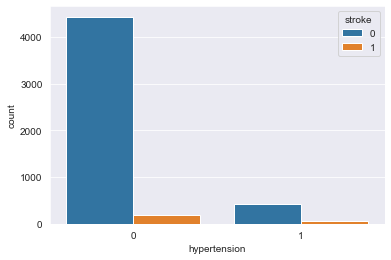

In [19]:
sns.countplot(x=df3['hypertension'],hue=df3['stroke'])
plt.show()

In [20]:
df3.groupby(['heart_disease'])['stroke'].value_counts()

heart_disease  stroke
0              0         4632
               1          202
1              0          229
               1           47
Name: stroke, dtype: int64

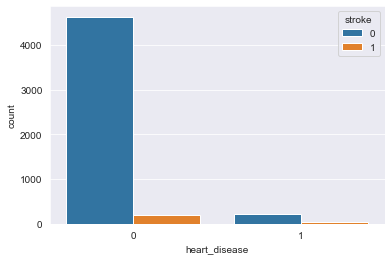

In [21]:
sns.countplot(x=df3['heart_disease'],hue=df3['stroke'])
plt.show()

In [22]:
df3.groupby(['ever_married'])['stroke'].value_counts()

ever_married  stroke
No            0         1728
              1           29
Yes           0         3133
              1          220
Name: stroke, dtype: int64

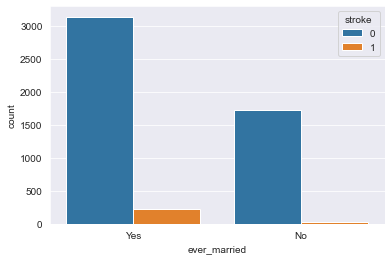

In [23]:
sns.countplot(x=df3['ever_married'],hue=df3['stroke'])
plt.show()

In [24]:
df3.groupby(['work_type'])['stroke'].value_counts()

work_type      stroke
Govt_job       0          624
               1           33
Never_worked   0           22
Private        0         2776
               1          149
Self-employed  0          754
               1           65
children       0          685
               1            2
Name: stroke, dtype: int64

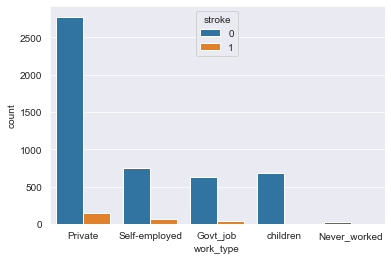

In [25]:
sns.countplot(x=df3['work_type'],hue=df3['stroke'])
plt.show()

In [26]:
df3.groupby(['Residence_type'])['stroke'].value_counts()

Residence_type  stroke
Rural           0         2400
                1          114
Urban           0         2461
                1          135
Name: stroke, dtype: int64

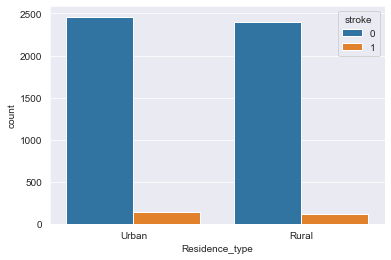

In [27]:
sns.countplot(x=df3['Residence_type'],hue=df3['stroke'])
plt.show()

In [28]:
df3.groupby(['smoking_status'])['stroke'].value_counts()

smoking_status   stroke
Unknown          0         1497
                 1           47
formerly smoked  0          815
                 1           70
never smoked     0         1802
                 1           90
smokes           0          747
                 1           42
Name: stroke, dtype: int64

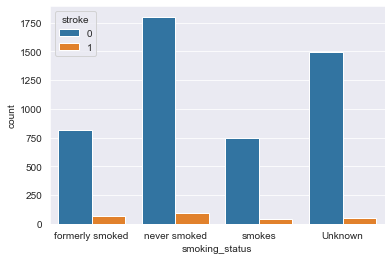

In [29]:
sns.countplot(x=df3['smoking_status'],hue=df3['stroke'])
plt.show()

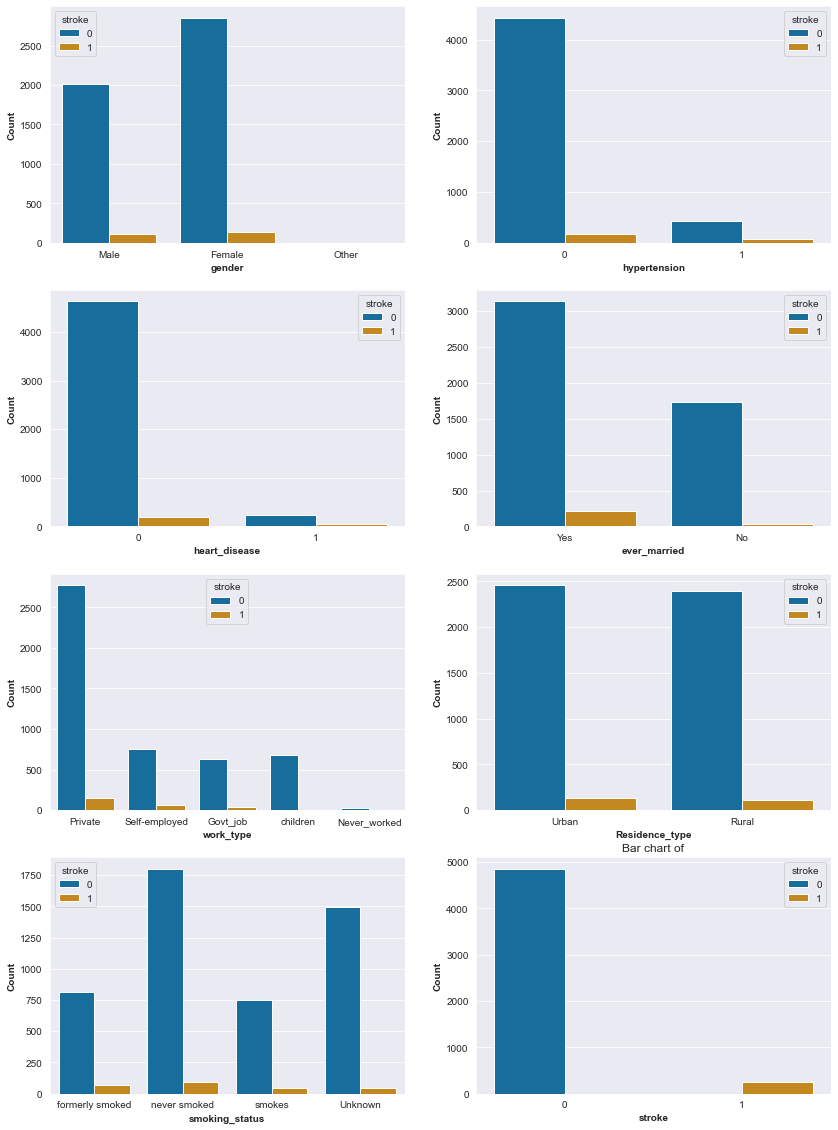

In [30]:
import seaborn as sns
cate_var = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status', 'stroke']

fig, axs = plt.subplots(4, 2, figsize=(14,20))
axs = axs.flatten()

# iterate through each column of df_catd and plot
for i, col_name in enumerate(cate_var):
    sns.countplot(x=col_name, data=df3, ax=axs[i], hue =df3['stroke'], palette = 'colorblind')
    plt.title("Bar chart of")
    axs[i].set_xlabel(f"{col_name}", weight = 'bold')
    axs[i].set_ylabel('Count', weight='bold')

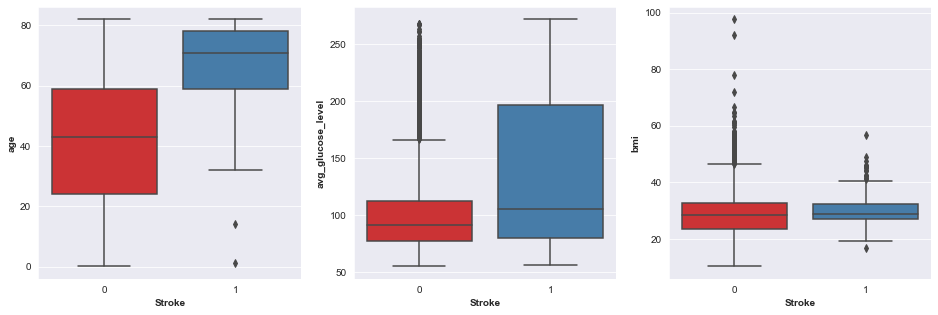

In [31]:
num_var = ['age', 'avg_glucose_level', 'bmi']

fig, axs = plt.subplots(1, 3, figsize=(16,5))
axs = axs.flatten()

# iterate through each column in df_num and plot
for i, col_name in enumerate(num_var):
    sns.boxplot(x="stroke", y=col_name, data=df3, ax=axs[i],  palette = 'Set1')
    axs[i].set_xlabel("Stroke", weight = 'bold')
    axs[i].set_ylabel(f"{col_name}", weight='bold')

From the above boxplot, some observations can be drawn:
age subjects with stroke tends to have higher mean age.
avg glucose level subjects with stroke tends to have higher average glucose level.
bmi index does not give much indication on the likelihood of experiencing stroke.
bmi index for super obesity is 50.
Outliers in this feature should be replaced to its highest limit (50).

In [32]:
bmi_outliers=df3.loc[df3['bmi']>50]
bmi_outliers['bmi'].shape

(79,)

In [33]:
df4 = df3.copy()

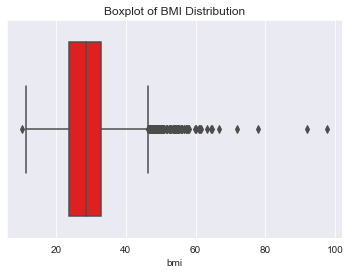

In [34]:
sns.boxplot(data=df4,x=df4["bmi"],color='red')
plt.title("Boxplot of BMI Distribution");

In [35]:
df4["bmi"] = pd.to_numeric(df4["bmi"])
df4["bmi"] = df4["bmi"].apply(lambda k: 50 if k > 50 else k)

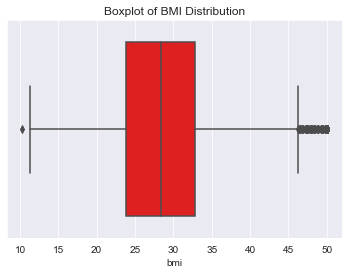

In [36]:
sns.boxplot(data=df4,x=df4["bmi"],color='red')
plt.title("Boxplot of BMI Distribution");

In [37]:
df5=df4.copy()
df5.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [38]:
le_gender = LabelEncoder()
le_evermarried = LabelEncoder()
le_worktype = LabelEncoder()
le_residencetype = LabelEncoder()
le_smokingstatus = LabelEncoder()

In [39]:
df5['gender_n'] = le_gender.fit_transform(df5['gender'])
df5['ever_married_n'] = le_evermarried.fit_transform(df5['ever_married'])
df5['work_type_n'] = le_worktype.fit_transform(df5['work_type'])
df5['Residence_type_n'] = le_residencetype.fit_transform(df5['Residence_type'])
df5['smoking_status_n'] = le_smokingstatus.fit_transform(df5['smoking_status'])
df5.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_n,ever_married_n,work_type_n,Residence_type_n,smoking_status_n
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,1,1,2,1,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,0,1,3,0,2
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,1,1,2,0,2
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,0,1,2,1,3
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,0,1,3,0,2


In [40]:
data1= df5.drop(['gender','ever_married','work_type','Residence_type','smoking_status'],axis='columns')
data1.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_n,ever_married_n,work_type_n,Residence_type_n,smoking_status_n
0,67.0,0,1,228.69,36.600000,1,1,1,2,1,1
1,61.0,0,0,202.21,28.893237,1,0,1,3,0,2
2,80.0,0,1,105.92,32.500000,1,1,1,2,0,2
3,49.0,0,0,171.23,34.400000,1,0,1,2,1,3
4,79.0,1,0,174.12,24.000000,1,0,1,3,0,2


In [41]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5110 non-null   float64
 1   hypertension       5110 non-null   int64  
 2   heart_disease      5110 non-null   int64  
 3   avg_glucose_level  5110 non-null   float64
 4   bmi                5110 non-null   float64
 5   stroke             5110 non-null   int64  
 6   gender_n           5110 non-null   int32  
 7   ever_married_n     5110 non-null   int32  
 8   work_type_n        5110 non-null   int32  
 9   Residence_type_n   5110 non-null   int32  
 10  smoking_status_n   5110 non-null   int32  
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.5 KB


In [42]:
data1=data1.drop(['gender_n','Residence_type_n'],axis='columns')
data1.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,ever_married_n,work_type_n,smoking_status_n
0,67.0,0,1,228.69,36.600000,1,1,2,1
1,61.0,0,0,202.21,28.893237,1,1,3,2
2,80.0,0,1,105.92,32.500000,1,1,2,2
3,49.0,0,0,171.23,34.400000,1,1,2,3
4,79.0,1,0,174.12,24.000000,1,1,3,2


In [43]:
data1.shape

(5110, 9)

In [44]:
X = data1.drop(['stroke'],axis='columns')
X.head(10)

,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married_n,work_type_n,smoking_status_n
0,67.0,0,1,228.69,36.600000,1,2,1
1,61.0,0,0,202.21,28.893237,1,3,2
2,80.0,0,1,105.92,32.500000,1,2,2
3,49.0,0,0,171.23,34.400000,1,2,3
4,79.0,1,0,174.12,24.000000,1,3,2
5,81.0,0,0,186.21,29.000000,1,2,1
6,74.0,1,1,70.09,27.400000,1,2,2
7,69.0,0,0,94.39,22.800000,0,2,2
8,59.0,0,0,76.15,28.893237,1,2,0
9,78.0,0,0,58.57,24.200000,1,2,0


In [45]:
X.shape

(5110, 8)

In [46]:
y = data1.stroke
y.head(3)

0    1
1    1
2    1
Name: stroke, dtype: int64

In [47]:
len(y)

5110

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [49]:
model_1 = LogisticRegression(solver='liblinear')
model_1.fit(X_train, y_train)
lra=model_1.score(X_test, y_test)
lra

0.9383561643835616

In [50]:
y_pred = model_1.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [106]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test, y_pred)

array([[922,  38],
       [ 55,   7]], dtype=int64)

In [107]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       960
           1       0.16      0.11      0.13        62

    accuracy                           0.91      1022
   macro avg       0.55      0.54      0.54      1022
weighted avg       0.90      0.91      0.90      1022



In [51]:
model_2 = tree.DecisionTreeClassifier(criterion='entropy')
model_2.fit(X_train, y_train)
dtc=model_2.score(X_train, y_train)
dtc

1.0

In [103]:
y_pred = model_2.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [105]:
confusion_matrix(y_test, y_pred)

array([[922,  38],
       [ 55,   7]], dtype=int64)

In [104]:
print(classification_report(y_test, y_pred))

[[922  38]
 [ 55   7]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       960
           1       0.16      0.11      0.13        62

    accuracy                           0.91      1022
   macro avg       0.55      0.54      0.54      1022
weighted avg       0.90      0.91      0.90      1022



In [53]:
model_3 = RandomForestClassifier(n_estimators=30)
model_3.fit(X_train, y_train)
rfc=model_3.score(X_test, y_test)
rfc

0.9363992172211351

In [54]:
y_pred = model_3.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [108]:
confusion_matrix(y_test,y_pred)

array([[922,  38],
       [ 55,   7]], dtype=int64)

In [109]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       960
           1       0.16      0.11      0.13        62

    accuracy                           0.91      1022
   macro avg       0.55      0.54      0.54      1022
weighted avg       0.90      0.91      0.90      1022



In [55]:
model_4 = SVC()
model_4.fit(X_train, y_train)
svc=model_4.score(X_test, y_test)
svc

0.9393346379647749

In [82]:
y_test = model_4.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [110]:
confusion_matrix(y_test, y_pred)

array([[922,  38],
       [ 55,   7]], dtype=int64)

In [111]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       960
           1       0.16      0.11      0.13        62

    accuracy                           0.91      1022
   macro avg       0.55      0.54      0.54      1022
weighted avg       0.90      0.91      0.90      1022



In [114]:
from sklearn.naive_bayes import GaussianNB

model_5 = GaussianNB()

model_5.fit(X_train, y_train)

gnb = model_5.score(X_train, y_train)
gnb

0.8732876712328768

In [116]:
y_pred = model_5.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [117]:
confusion_matrix(y_test,y_pred)

array([[864,  96],
       [ 44,  18]], dtype=int64)

In [118]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       960
           1       0.16      0.29      0.20        62

    accuracy                           0.86      1022
   macro avg       0.55      0.60      0.56      1022
weighted avg       0.90      0.86      0.88      1022



In [119]:
accuracy = [lra,dtc,rfc,svc,gnb]
allModels = ['LogisticRegression','DecisonTreeClassifier','RandomForestClassifier','SVC','Naive Bayes']

score_df = pd.DataFrame({'Algorithms': allModels, 'Accuracy_Score': accuracy})
score_df.style.background_gradient(cmap="YlGnBu",high=1,axis=0)

,Algorithms,Accuracy_Score
0,LogisticRegression,0.938356
1,DecisonTreeClassifier,1.000000
2,RandomForestClassifier,0.936399
3,SVC,0.939335
4,Naive Bayes,0.873288


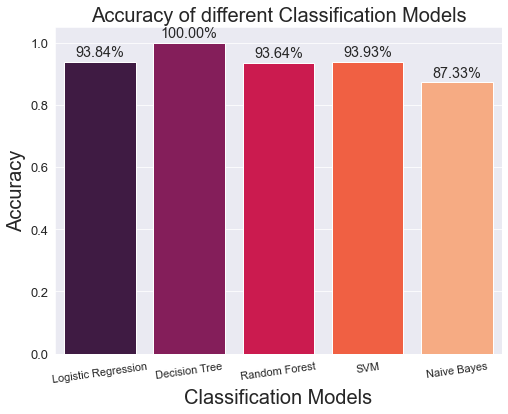

In [120]:
mylist=[]
mylist2=[]
mylist.append(lra)
mylist2.append("Logistic Regression")
mylist.append(dtc)
mylist2.append("Decision Tree")
mylist.append(rfc)
mylist2.append("Random Forest")
mylist.append(svc)
mylist2.append("SVM")
mylist.append(gnb)
mylist2.append("Naive Bayes")
plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "rocket", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [123]:
model_4.predict([[51,0,0,167,25,1,2,1]])

array([0], dtype=int64)

In [60]:
def predict_stroke(ag,hptn,hrtdis,agl,bmii,evemar,wrktyp,smok):    
    x = np.zeros(len(X.columns))
    x[0] = ag
    x[1] = hptn
    x[2] = hrtdis
    x[3] = agl
    x[4] = bmii
    x[5] = evemar
    x[6] = wrktyp
    x[7] = smok
    return model_4.predict([x])[0]

In [125]:
predict_stroke(51,0,0,167,25,1,2,1)

0